# **Structured Data Assignment**

## Problem Statement

The dataset in question contains a comprehensive collection of electronic health records belonging to patients who have been diagnosed with a specific disease. These health records comprise a detailed log of every aspect of the patients' medical history, including all diagnoses, symptoms, prescribed drug treatments, and medical tests that they have undergone. Each row represents a healthcare record/medical event for a patient and it includes a timestamp for each entry/event, thereby allowing for a chronological view of the patient's medical history.

The Data has mainly three columns

Patient-Uid - Unique Alphanumeric Identifier for a patient

Date - Date when patient encountered the event.

Incident - This columns describes which event occurred on the day.

## First Problem

The development of drugs is critical in providing therapeutic options for patients suffering from chronic and terminal illnesses. “Target Drug”, in particular, is designed to enhance the patient's health and well-being without causing dependence on other medications that could potentially lead to severe and life-threatening side effects. These drugs are specifically tailored to treat a particular disease or condition, offering a more focused and effective approach to treatment, while minimising the risk of harmful reactions.

## Expected Outcome

To create a predictive model that determines the eligibility of patients for receiving the "Target Drug" within the next 30 days. Identifying whether a patient meets the eligibility criteria will enable physicians to make well-informed decisions about the appropriate treatments to administer. A patient is deemed eligible for a specific medication when they receive their initial prescription for that particular drug. This model aims to provide timely and accurate insights into patient eligibility, thereby supporting healthcare providers in delivering personalized and effective medical interventions.

### Leveraging Advanced Prediction Algorithms for Enhanced Patient Care

1. **Personalized Treatment Approach:**
   - The algorithm enables the identification of eligible patients for specific drugs, facilitating the delivery of personalized treatment plans tailored to individual patient needs.

2. **Optimized Healthcare Decision-Making:**
   - By accurately predicting patient eligibility, healthcare providers can make informed decisions on suitable treatments, leading to more effective and targeted healthcare interventions.

3. **Efficient Resource Allocation:**
   - The algorithm assists in the efficient allocation of medical resources by ensuring that the 'TARGET DRUG' is administered to eligible patients, optimizing the utilization of crucial medical supplies and resources.

4. **Improved Patient Outcomes:**
   - The use of the algorithm contributes to improved patient outcomes by ensuring that patients receive timely and appropriate treatments, enhancing their overall health and well-being.

5. **Reduction of Adverse Effects:**
   - By precisely identifying eligible patients, the algorithm aids in reducing the risk of administering drugs to patients for whom they may cause adverse effects, leading to a safer and more effective treatment process.

6. **Enhanced Healthcare Efficiency:**
   - The algorithm streamlines the decision-making process for healthcare providers, enhancing the overall efficiency of healthcare services and promoting a more systematic approach to patient care.

The development and implementation of this algorithm represent a significant advancement in the medical field, empowering healthcare providers with a powerful tool to make informed decisions, optimize resource allocation, and ultimately improve patient outcomes, thus heralding a new era of personalized and effective healthcare solutions.

# Importing Libraries

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, roc_auc_score as ras, roc_curve, auc, accuracy_score
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

1. **pandas (pd):** Pandas is a popular data manipulation and analysis library in Python. It provides data structures and functions for efficiently working with structured data.

2. **numpy (np):** Numpy is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of high-level mathematical functions to operate on these arrays.

3. **seaborn (sns):** Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics.

4. **matplotlib.pyplot (plt):** Matplotlib is a comprehensive library for creating static, interactive, and animated visualizations in Python. The pyplot module provides a MATLAB-like plotting framework.

5. **train_test_split:** This function from the `sklearn.model_selection` module is used for splitting the dataset into training and testing sets for model evaluation and validation purposes.

6. **confusion_matrix:** The `confusion_matrix` function from `sklearn.metrics` is used to evaluate the performance of a classification model by displaying the counts of true positive, true negative, false positive, and false negative predictions.

7. **classification_report:** The `classification_report` function provides a comprehensive report that includes various metrics such as precision, recall, and F1 score, along with support metrics for each class in the dataset.

8. **f1_score:** The `f1_score` function computes the F1 score, which is the harmonic mean of precision and recall, providing a single score that balances both measures.

9. **roc_auc_score, roc_curve, auc:** These functions are used to calculate and plot the Receiver Operating Characteristic (ROC) curve and compute the Area Under the Curve (AUC) score, which are important metrics for evaluating the performance of binary classification models.

10. **accuracy_score:** The `accuracy_score` function is used to calculate the accuracy of the model, which is the ratio of the number of correct predictions to the total number of predictions.

12. **XGBClassifier:** This class from the `xgboost` library provides an implementation of the XGBoost algorithm, which is an efficient and scalable machine learning algorithm used for supervised learning tasks, particularly in gradient boosting.

13. **warnings:** The `warnings` module is used to handle warnings during code execution. In this case, the `filterwarnings` function is used to suppress specific warnings for a cleaner display of results.

# Loading the Dataset

In [86]:
train_df = pd.read_parquet('/content/train.parquet')

1. **pd.read_parquet:** This function is part of the pandas library and is used to read data from a Parquet file format. Parquet is a columnar storage file format that is well-suited for storing and analyzing large, complex datasets.

2. **train_df:** It is the variable name assigned to store the data read from the Parquet file. The suffix "_df" typically suggests that the variable is used to store a DataFrame, which is a two-dimensional, size-mutable, and potentially heterogeneous tabular data structure with labeled axes (rows and columns).

3. **train.parquet:** This is the file path specifying the location of the Parquet file to be read. Ensure that the file exists at the specified path, and the path is correct.

In this specific case, the code is used to read data from a Parquet file named 'train.parquet' located in the '/content/' directory. The resulting data will be stored in the DataFrame named 'train_df', allowing for subsequent data analysis and modeling tasks.

In [87]:
# Checking size of dataset
print("Data set size : ", train_df.shape)

Data set size :  (3220868, 3)


In [88]:
train_df.head()

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


In [89]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220868 entries, 0 to 29080911
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Patient-Uid  object        
 1   Date         datetime64[ns]
 2   Incident     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 98.3+ MB


In [90]:
# Finding the column names
train_df.columns

Index(['Patient-Uid', 'Date', 'Incident'], dtype='object')

In [91]:
# Basic statistical analysis of dataset
train_df.describe()

,Patient-Uid,Date,Incident
count,3220868,3220868,3220868
unique,27033,1977,57
top,a0ddfd2c-1c7c-11ec-876d-16262ee38c7f,2019-05-21 00:00:00,DRUG_TYPE_6
freq,1645,3678,561934
first,NaN,2015-04-07 00:00:00,NaN
last,NaN,2020-09-03 00:00:00,NaN


In [92]:
# checking unique values
train_df.nunique()

Patient-Uid    27033
Date            1977
Incident          57
dtype: int64

# Cleaning of Data

In [93]:
# checking for null values
train_df.isnull().sum()

Patient-Uid    0
Date           0
Incident       0
dtype: int64

## Treating The Duplicates

Treating duplicates is important for the following reasons:

1. **Data Accuracy:** Duplicate values can lead to inaccurate results and biased insights, affecting the validity of any statistical analysis or model training conducted on the dataset.

2. **Model Performance:** Duplicates can lead to overfitting, where the model performs well on the training data but poorly on unseen data. Removing duplicates can help improve the generalizability and robustness of the predictive model.

By identifying and treating duplicate values, the data's integrity and quality are maintained, leading to more reliable insights and predictions derived from the dataset.

In [94]:
#checking for no of duplicate values
train_df.duplicated().sum()

35571

This code checks for the number of duplicate values in the dataset `train_df` using the `duplicated()` function. Duplicates can be problematic during data analysis and modeling as they can skew statistical analyses and machine learning model training.

In [95]:
# Droping duplicates
train_df = train_df.drop_duplicates()

In [96]:
# Final check after droping the duplicates
train_df.duplicated().sum()

0

In [97]:
# checking data size after droping duplicates
train_df.shape

(3185297, 3)

In [98]:
print("Unique values of Incident \n")
print(train_df['Incident'].unique())

Unique values of Incident 

['PRIMARY_DIAGNOSIS' 'SYMPTOM_TYPE_0' 'DRUG_TYPE_0' 'DRUG_TYPE_1'
 'DRUG_TYPE_2' 'TEST_TYPE_0' 'DRUG_TYPE_3' 'DRUG_TYPE_4' 'DRUG_TYPE_5'
 'DRUG_TYPE_6' 'DRUG_TYPE_8' 'DRUG_TYPE_7' 'SYMPTOM_TYPE_1' 'DRUG_TYPE_10'
 'SYMPTOM_TYPE_29' 'SYMPTOM_TYPE_2' 'DRUG_TYPE_11' 'DRUG_TYPE_9'
 'DRUG_TYPE_13' 'SYMPTOM_TYPE_5' 'TEST_TYPE_1' 'SYMPTOM_TYPE_6'
 'TEST_TYPE_2' 'SYMPTOM_TYPE_3' 'SYMPTOM_TYPE_8' 'DRUG_TYPE_14'
 'DRUG_TYPE_12' 'SYMPTOM_TYPE_9' 'SYMPTOM_TYPE_10' 'SYMPTOM_TYPE_7'
 'SYMPTOM_TYPE_11' 'TEST_TYPE_3' 'DRUG_TYPE_15' 'SYMPTOM_TYPE_4'
 'SYMPTOM_TYPE_14' 'SYMPTOM_TYPE_13' 'SYMPTOM_TYPE_16' 'SYMPTOM_TYPE_17'
 'SYMPTOM_TYPE_15' 'SYMPTOM_TYPE_18' 'SYMPTOM_TYPE_12' 'SYMPTOM_TYPE_20'
 'SYMPTOM_TYPE_21' 'DRUG_TYPE_17' 'SYMPTOM_TYPE_22' 'TEST_TYPE_4'
 'SYMPTOM_TYPE_23' 'DRUG_TYPE_16' 'TEST_TYPE_5' 'SYMPTOM_TYPE_19'
 'SYMPTOM_TYPE_24' 'SYMPTOM_TYPE_25' 'SYMPTOM_TYPE_26' 'SYMPTOM_TYPE_27'
 'DRUG_TYPE_18' 'SYMPTOM_TYPE_28' 'TARGET DRUG']


In [99]:
#no of counts for particular Incident
train_df.Incident.value_counts()

DRUG_TYPE_6          549616
DRUG_TYPE_1          484565
PRIMARY_DIAGNOSIS    424879
DRUG_TYPE_0          298881
DRUG_TYPE_2          256203
DRUG_TYPE_7          251239
DRUG_TYPE_8          158706
DRUG_TYPE_3          126615
TEST_TYPE_1           96810
TARGET DRUG           67218
DRUG_TYPE_9           66894
DRUG_TYPE_5           55940
SYMPTOM_TYPE_0        46078
DRUG_TYPE_11          45419
SYMPTOM_TYPE_6        32066
TEST_TYPE_0           27570
SYMPTOM_TYPE_7        22019
DRUG_TYPE_10          20911
DRUG_TYPE_14          17306
DRUG_TYPE_13          12321
DRUG_TYPE_12           9540
SYMPTOM_TYPE_14        8927
SYMPTOM_TYPE_1         8608
SYMPTOM_TYPE_2         8168
TEST_TYPE_3            8115
SYMPTOM_TYPE_5         7583
SYMPTOM_TYPE_8         7430
TEST_TYPE_2            7021
SYMPTOM_TYPE_15        6295
SYMPTOM_TYPE_10        6005
SYMPTOM_TYPE_29        5910
SYMPTOM_TYPE_16        4940
DRUG_TYPE_15           4906
SYMPTOM_TYPE_9         4885
DRUG_TYPE_4            4566
SYMPTOM_TYPE_4      

In [100]:
# number of counts for particular Date
train_df.Date.value_counts()

2019-05-21    3645
2019-05-22    3330
2019-03-05    3156
2019-05-14    3134
2019-03-12    2986
              ... 
2017-01-27     308
2017-02-28     285
2020-02-29     282
2016-01-29     271
2016-02-29     255
Name: Date, Length: 1977, dtype: int64

## Generating Positive Set

Generating the positive set in this context serves several important purposes:

1. **Focused Analysis:** By creating a subset that specifically focuses on instances related to the 'TARGET DRUG', the analysis can be tailored to understand the characteristics and patterns associated with this particular medication. This focused approach allows for a deeper exploration of the factors influencing the eligibility and prescription of the 'TARGET DRUG'.

2. **Targeted Model Development:** When building a predictive model for determining patient eligibility for the 'TARGET DRUG', having a distinct positive set that represents instances where the drug has been prescribed is crucial. This enables the model to learn patterns and features specific to cases where the drug is administered, leading to more accurate predictions for future instances.

By generating and analyzing the positive set, the focus is placed on understanding the specific instances related to the 'TARGET DRUG', which is instrumental in developing an accurate and effective predictive model for patient eligibility assessment.

In [101]:
# generating positive set
positive_df = train_df[train_df['Incident']=='TARGET DRUG']
positive_df.head()

,Patient-Uid,Date,Incident
3294791,a0eb742b-1c7c-11ec-8f61-16262ee38c7f,2020-04-09,TARGET DRUG
3296990,a0edaf09-1c7c-11ec-a360-16262ee38c7f,2018-06-12,TARGET DRUG
3305387,a0e9fa0e-1c7c-11ec-8dc7-16262ee38c7f,2019-06-11,TARGET DRUG
3309423,a0ecc615-1c7c-11ec-aa31-16262ee38c7f,2019-11-15,TARGET DRUG
3309494,a0ea612f-1c7c-11ec-8cf0-16262ee38c7f,2020-03-18,TARGET DRUG


This code snippet generates a subset of the dataset `train_df` that includes only the instances where the 'Incident' column has the value 'TARGET DRUG', effectively creating the positive set. This positive set specifically focuses on instances where patients have had an incident related to the 'TARGET DRUG', indicating that they have been prescribed or have had an interaction with this particular drug.

**Details:**

1. **Subset Creation:** The code uses boolean indexing to filter the rows of `train_df` where the 'Incident' column is 'TARGET DRUG', thereby creating a subset called `positive_df`.

2. **Focus on Specific Drug:** By isolating instances related to the 'TARGET DRUG', the subset aims to capture and analyze data points specifically associated with this drug, which is crucial for understanding the eligibility criteria and patterns related to its prescription.

3. **Initial Inspection:** The `head()` function is used to display the first few rows of the `positive_df` DataFrame, allowing for an initial inspection of the data points related to the 'TARGET DRUG' incidents. This helps in understanding the structure and content of the dataset associated with the drug in question.

In [102]:
# shape of positive set
positive_df.shape

(67218, 3)

In [103]:
negative =  train_df[~train_df['Patient-Uid'].isin(positive_df['Patient-Uid'])]
negative_df = negative.groupby('Patient-Uid').tail(1)
negative_df

,Patient-Uid,Date,Incident
1560892,a0e3a8c0-1c7c-11ec-98c2-16262ee38c7f,2018-05-06,PRIMARY_DIAGNOSIS
1620903,a0dd6a3f-1c7c-11ec-9b86-16262ee38c7f,2015-04-07,SYMPTOM_TYPE_0
1629044,a0e48a75-1c7c-11ec-8c5f-16262ee38c7f,2018-08-22,DRUG_TYPE_6
1942882,a0e3cf61-1c7c-11ec-8098-16262ee38c7f,2018-08-21,DRUG_TYPE_2
1975541,a0e91a8c-1c7c-11ec-acc2-16262ee38c7f,2020-04-15,PRIMARY_DIAGNOSIS
...,...,...,...
3256795,a0e045a1-1c7c-11ec-8014-16262ee38c7f,2020-07-10,PRIMARY_DIAGNOSIS
3256799,a0e67e2a-1c7c-11ec-b805-16262ee38c7f,2015-12-16,PRIMARY_DIAGNOSIS
3256800,a0dec400-1c7c-11ec-80df-16262ee38c7f,2019-08-06,PRIMARY_DIAGNOSIS
3256804,a0e09919-1c7c-11ec-9e7d-16262ee38c7f,2017-02-19,DRUG_TYPE_6


In [104]:
# shape of negative set
negative_df.shape

(17659, 3)

In [105]:
# to get the count of previous prescriptions within specific time intervals
positive_df['Prescription_Count'] = positive_df.groupby('Patient-Uid')['Date'].cumcount()
negative_df['Prescription_Count'] = negative_df.groupby('Patient-Uid')['Date'].cumcount()
positive_df.tail(5)

,Patient-Uid,Date,Incident,Prescription_Count
29074998,a0ef2b6d-1c7c-11ec-9172-16262ee38c7f,2018-10-12,TARGET DRUG,4
29075105,a0ebe423-1c7c-11ec-a5e0-16262ee38c7f,2019-07-02,TARGET DRUG,9
29075494,a0ebc713-1c7c-11ec-bd53-16262ee38c7f,2019-05-21,TARGET DRUG,10
29080031,a0ee1bdb-1c7c-11ec-90ba-16262ee38c7f,2018-06-07,TARGET DRUG,14
29080178,a0eef180-1c7c-11ec-8de8-16262ee38c7f,2018-07-17,TARGET DRUG,13


1. **Counting Previous Prescriptions:** The code calculates the count of previous prescriptions within specific time intervals for both the positive and negative datasets. This count is assigned to a new column called 'Prescription_Count' in each of the datasets.

2. **Grouping by Patient ID:** The `groupby` function is used to group the data based on the unique 'Patient-Uid' values, enabling the calculation of the cumulative count of previous prescriptions for each patient. This step allows for the tracking of the number of previous prescriptions a patient has received before a specific incident related to the 'TARGET DRUG'.

3. **Integration into DataFrame:** The calculated 'Prescription_Count' values are integrated into the respective DataFrames, 'positive_df' and 'negative_df', to provide a comprehensive view of the prescription history for each patient.

4. **Preview of Data:** The `tail(5)` function displays the last five rows of the 'positive_df' DataFrame, allowing for a quick check of the recently added 'Prescription_Count' values and their integration into the dataset.

In [106]:
negative_df.tail()

,Patient-Uid,Date,Incident,Prescription_Count
3256795,a0e045a1-1c7c-11ec-8014-16262ee38c7f,2020-07-10,PRIMARY_DIAGNOSIS,0
3256799,a0e67e2a-1c7c-11ec-b805-16262ee38c7f,2015-12-16,PRIMARY_DIAGNOSIS,0
3256800,a0dec400-1c7c-11ec-80df-16262ee38c7f,2019-08-06,PRIMARY_DIAGNOSIS,0
3256804,a0e09919-1c7c-11ec-9e7d-16262ee38c7f,2017-02-19,DRUG_TYPE_6,0
3256805,a0e69331-1c7c-11ec-a98d-16262ee38c7f,2015-10-03,DRUG_TYPE_6,0


In [107]:
# to get the difference between the most recent prescription and the prediction date.
prediction_date = pd.to_datetime('today') + pd.DateOffset(days=30)
positive_df['Time_diff'] = (prediction_date - positive_df.groupby('Patient-Uid')['Date'].transform('max')).dt.days
negative_df['Time_diff'] = (prediction_date - negative_df.groupby('Patient-Uid')['Date'].transform('max')).dt.days

1. **Setting Prediction Date:** The code initializes the 'prediction_date' variable to be the current date plus a DateOffset of 30 days, representing the date 30 days from today, as the objective is to predict eligibility for the 'TARGET DRUG' within the next 30 days.

2. **Calculating Time Differences:** Using the 'prediction_date' and the 'Date' column, the code calculates the time differences between the most recent prescription date for each patient ('Patient-Uid') and the 'prediction_date' for both the positive and negative datasets. This time difference is calculated in terms of days and represents the time gap between the most recent prescription date and the prediction date.

3. **Integration into DataFrames:** The calculated 'Time_diff' values are integrated into the 'positive_df' and 'negative_df' DataFrames to provide insights into the time elapsed since the most recent prescription for each patient.

By calculating the time differences, the code enables the evaluation of the time gap between the most recent prescription date and the upcoming prediction date, providing valuable information for assessing patient eligibility for the 'TARGET DRUG' within the specified time frame.

In [108]:
positive_df.head()

,Patient-Uid,Date,Incident,Prescription_Count,Time_diff
3294791,a0eb742b-1c7c-11ec-8f61-16262ee38c7f,2020-04-09,TARGET DRUG,0,1197
3296990,a0edaf09-1c7c-11ec-a360-16262ee38c7f,2018-06-12,TARGET DRUG,0,1451
3305387,a0e9fa0e-1c7c-11ec-8dc7-16262ee38c7f,2019-06-11,TARGET DRUG,0,1476
3309423,a0ecc615-1c7c-11ec-aa31-16262ee38c7f,2019-11-15,TARGET DRUG,0,1181
3309494,a0ea612f-1c7c-11ec-8cf0-16262ee38c7f,2020-03-18,TARGET DRUG,0,1197


In [109]:
negative_df.head()

,Patient-Uid,Date,Incident,Prescription_Count,Time_diff
1560892,a0e3a8c0-1c7c-11ec-98c2-16262ee38c7f,2018-05-06,PRIMARY_DIAGNOSIS,0,2027
1620903,a0dd6a3f-1c7c-11ec-9b86-16262ee38c7f,2015-04-07,SYMPTOM_TYPE_0,0,3152
1629044,a0e48a75-1c7c-11ec-8c5f-16262ee38c7f,2018-08-22,DRUG_TYPE_6,0,1919
1942882,a0e3cf61-1c7c-11ec-8098-16262ee38c7f,2018-08-21,DRUG_TYPE_2,0,1920
1975541,a0e91a8c-1c7c-11ec-acc2-16262ee38c7f,2020-04-15,PRIMARY_DIAGNOSIS,0,1317


In [110]:
# creating new dataset by concating positive and negative sets
new_df = pd.concat([positive_df, negative_df])
new_df.head()

,Patient-Uid,Date,Incident,Prescription_Count,Time_diff
3294791,a0eb742b-1c7c-11ec-8f61-16262ee38c7f,2020-04-09,TARGET DRUG,0,1197
3296990,a0edaf09-1c7c-11ec-a360-16262ee38c7f,2018-06-12,TARGET DRUG,0,1451
3305387,a0e9fa0e-1c7c-11ec-8dc7-16262ee38c7f,2019-06-11,TARGET DRUG,0,1476
3309423,a0ecc615-1c7c-11ec-aa31-16262ee38c7f,2019-11-15,TARGET DRUG,0,1181
3309494,a0ea612f-1c7c-11ec-8cf0-16262ee38c7f,2020-03-18,TARGET DRUG,0,1197


In [111]:
new_df.shape

(84877, 5)

In [112]:
# splitting dataset into train & test sets
X_train,X_test,y_train,y_test = X_train, X_test, y_train, y_test = train_test_split(new_df[['Prescription_Count', 'Time_diff']], new_df['Incident'] == 'TARGET DRUG', test_size = 0.25, random_state=42)


In [113]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((63657, 2), (21220, 2), (63657,), (21220,))

## XGBoost Classifier Initialization

XGBoost is a suitable choice for this problem due to the following reasons:

1. **Handling Imbalanced Data:** XGBoost can handle imbalanced datasets well, which is often the case in medical data where the occurrences of certain conditions or events may be rare.

2. **High Performance:** XGBoost is known for its computational efficiency and scalability, making it suitable for large datasets and complex models.

3. **Regularization Techniques:** XGBoost implements various regularization techniques to prevent overfitting, which is essential for developing a reliable predictive model.

4. **Predictive Accuracy:** XGBoost often yields high predictive accuracy and is robust against outliers and noisy data, making it an ideal choice for accurately predicting patient eligibility for the 'TARGET DRUG'.

By utilizing XGBoost, the code aims to build a robust and accurate predictive model that can effectively determine patient eligibility for the 'TARGET DRUG' within the specified time frame.

In [114]:
# building model to train the data
xgb_classifier =  XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

1. **XGBoost Classifier Initialization:** The code initializes an instance of the XGBoost classifier, 'xgb_classifier', with a specified random state of 42. XGBoost is an implementation of the gradient boosting algorithm, which is widely used for classification and regression tasks, known for its speed and performance.

2. **Model Training:** The `fit` function is used to train the XGBoost classifier on the training data, `X_train` and `y_train`, where `X_train` represents the feature set and `y_train` represents the target variable for the training dataset.

3. **Model Building:** By fitting the XGBoost classifier to the training data, the model learns the patterns and relationships within the data, enabling it to make predictions and classify whether a patient will be eligible for the 'TARGET DRUG' within the next 30 days.

In [115]:
#predicting test data
y_pred = xgb_classifier.predict(X_test)

The code performs predictions using the trained XGBoost classifier on the test dataset to determine whether patients in the test set will be eligible for the 'TARGET DRUG' within the next 30 days. The predictions are vital for evaluating the model's performance and its ability to accurately classify patients as eligible or not, aiding physicians in making informed decisions about the appropriate treatments for the patients.

In [116]:
# to evaluate the model - confusion_matrix
conf_matrix_report = confusion_matrix(y_test, y_pred)
conf_matrix_report

array([[ 4015,   377],
       [  895, 15933]])

The confusion matrix is a vital tool for assessing the performance of the predictive model. It provides valuable insights into the model's ability to correctly or incorrectly predict patient eligibility for the 'TARGET DRUG' within the specified time frame. Understanding the confusion matrix allows for the evaluation of the model's effectiveness in making accurate predictions, guiding healthcare providers in making informed decisions about patient treatment and medication eligibility.

In [117]:
# evaluating the model - classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.82      0.91      0.86      4392
        True       0.98      0.95      0.96     16828

    accuracy                           0.94     21220
   macro avg       0.90      0.93      0.91     21220
weighted avg       0.94      0.94      0.94     21220



In [118]:
# calculating F1 score
F1_score = f1_score(y_test, y_pred)
F1_score

0.9616150642766613

The F1 score is a crucial metric for evaluating the overall performance of the classification model. It considers both the precision (the ability of the model not to label a negative sample as positive) and recall (the ability of the model to find all the positive samples), providing a balanced assessment of the model's accuracy in predicting patient eligibility for the 'TARGET DRUG' within the specified time frame. A higher F1 score indicates better model performance.

In [119]:
# model accuracy
accuracy_score(y_test, y_pred)

0.9400565504241282

The code calculates the accuracy score of the predictive model using the actual target values from the test dataset, represented by 'y_test', and the predicted target values from the model, represented by 'y_pred'. The accuracy score is a metric that measures the overall performance of the classification model by computing the ratio of correctly predicted observations to the total observations.

The output represents the accuracy score calculated for the model's performance in predicting patient eligibility for the 'TARGET DRUG' within the specified time frame. A higher accuracy score indicates a more reliable and effective model in accurately classifying patients as eligible or not, providing crucial insights for physicians to make informed decisions about patient treatments and medication eligibility.

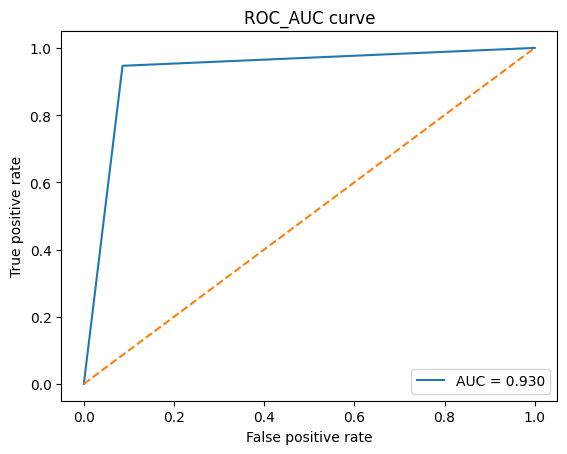

In [120]:
# evaluating model by roc_auc curve
fpr,tpr, thresold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr, label = 'AUC = %0.3f' % roc_auc)
plt.plot([0,1],[0,1],'--')
plt.title('ROC_AUC curve')
plt.legend(loc='lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

1. **ROC Curve Generation:** The code generates the Receiver Operating Characteristic (ROC) curve using the false positive rate (fpr) and true positive rate (tpr) calculated from the test dataset's actual target values, 'y_test', and the predicted target values from the model, 'y_pred'. The ROC curve is a graphical representation that illustrates the performance of a classification model at various classification thresholds.

2. **AUC Computation:** The code calculates the Area Under the Curve (AUC) score using the fpr and tpr values obtained from the ROC curve. The AUC score represents the degree or measure of separability, indicating how well the model distinguishes between classes.

3. **Plotting the Curve:** The code plots the ROC curve with the AUC score as the label. It also includes a diagonal dashed line representing the ROC curve of a purely random classifier.

4. **Visualization:** The plot is displayed with labels for the X and Y axes, a title for the plot, and a legend indicating the AUC value.

The ROC curve and AUC score are important tools for evaluating the performance of the classification model, providing insights into the model's ability to discriminate between positive and negative classes. A higher AUC score generally indicates better discriminatory performance of the model.

## Test Dataset

Working with a test dataset is an essential part of the model development process.

1. **Model Evaluation:** The test dataset is used to assess the performance of the trained model on unseen data. This evaluation ensures that the model can generalize well and make accurate predictions on data it hasn't been trained on.

2. **Performance Assessment:** Testing the model on an independent dataset provides an objective measure of its performance in real-world scenarios. This process helps to gauge how well the model can handle new, unseen instances and make reliable predictions.

3. **Generalization Check:** Testing the model on a separate dataset helps to verify that the model has not overfit to the training data. It ensures that the model has learned the underlying patterns and relationships in the data rather than memorizing the training samples.

4. **Error Identification:** Analyzing the model's performance on the test dataset helps identify any potential issues or errors, such as underfitting or overfitting, which can be crucial for refining the model and improving its predictive capabilities.

5. **Validation of Results:** Testing the model on a separate dataset provides validation of the results and ensures that the model's predictions are reliable and accurate, thus instilling confidence in the model's performance.

By incorporating the test dataset into the model development process, you can ensure the reliability and effectiveness of the predictive model in making accurate predictions on new, unseen data, thereby facilitating informed decision-making in various domains, including healthcare and medicine.

In [121]:
test_df = pd.read_parquet("/content/test.parquet")

In [122]:
test_df.shape

(1065524, 3)

In [123]:
test_df.head()

,Patient-Uid,Date,Incident
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,DRUG_TYPE_0
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,DRUG_TYPE_2
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,DRUG_TYPE_1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,SYMPTOM_TYPE_0


In [124]:
test_df.tail()

,Patient-Uid,Date,Incident
1372854,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-05-11,DRUG_TYPE_13
1372856,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2018-08-22,DRUG_TYPE_2
1372857,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-02-04,DRUG_TYPE_2
1372858,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-09-25,DRUG_TYPE_8
1372859,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-05-19,DRUG_TYPE_7


In [125]:
test_df.columns

Index(['Patient-Uid', 'Date', 'Incident'], dtype='object')

In [126]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1065524 entries, 0 to 1372859
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Patient-Uid  1065524 non-null  object        
 1   Date         1065524 non-null  datetime64[ns]
 2   Incident     1065524 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 32.5+ MB


In [127]:
test_df.describe()

,Patient-Uid,Date,Incident
count,1065524,1065524,1065524
unique,11482,1947,55
top,a0faa6ed-1c7c-11ec-8f6f-16262ee38c7f,2018-03-13 00:00:00,DRUG_TYPE_6
freq,1236,1139,192292
first,NaN,2015-04-07 00:00:00,NaN
last,NaN,2020-08-04 00:00:00,NaN


In [128]:
test_df.nunique()

Patient-Uid    11482
Date            1947
Incident          55
dtype: int64

In [129]:
#checking for null values
test_df.isnull().sum()

Patient-Uid    0
Date           0
Incident       0
dtype: int64

In [130]:
#checking for no of duplicate values
test_df.duplicated().sum()

12100

In [131]:
#droping duplicates
test_df = test_df.drop_duplicates()

In [132]:
#after droping agin check for no of duplicates
test_df.duplicated().sum()

0

In [133]:
test_df['Prescription_Count'] = test_df.groupby('Patient-Uid')['Date'].cumcount()
test_df['Time_diff'] = (prediction_date - test_df.groupby('Patient-Uid')['Date'].transform(max)).dt.days

1. **Counting Previous Prescriptions for Test Data:** The code calculates the count of previous prescriptions within specific time intervals for the test dataset. The 'Prescription_Count' is determined based on the cumulative count of previous prescriptions for each patient, which is calculated using the `cumcount()` function and grouped by 'Patient-Uid'.

2. **Calculating Time Differences for Test Data:** The code calculates the time differences between the most recent prescription date and the 'prediction_date' for the test dataset. This time difference is computed in terms of days using the 'Date' column and the `transform()` function, which determines the maximum date for each patient group, and then the 'prediction_date' is subtracted to find the time difference.

By calculating the 'Prescription_Count' and 'Time_diff' for the test dataset, the code prepares the necessary features that will be used to evaluate the model's performance on the test data and make predictions about patient eligibility for the 'TARGET DRUG' within the specified time frame.

In [134]:
test_data_pred = xgb_classifier.predict(test_df[['Prescription_Count', 'Time_diff']])


1. **Assessing Model Generalization:**
    - We are utilizing the trained XGBoost classifier to predict the eligibility of patients in the test dataset for the 'TARGET DRUG' within the next 30 days.
    - This process enables us to evaluate how well the model performs on new, unseen data, providing crucial insights into its ability to generalize to real-world scenarios.

2. **Feature Utilization for Prediction:**
    - To make accurate predictions, we are leveraging the features 'Prescription_Count' and 'Time_diff' from the test dataset.
    - 'Prescription_Count' helps us understand each patient's prescription history, while 'Time_diff' provides insights into the time difference since their last prescription.

3. **Insights for Informed Predictions:**
    - These features play a pivotal role in helping the model comprehend the patient's medical background and treatment patterns, allowing it to make informed predictions about their eligibility for the 'TARGET DRUG' within the specified time frame.

4. **Predictive Analysis with XGBoost:**
    - By using the 'xgb_classifier.predict()' function, we are leveraging the power of the XGBoost classifier to predict the target variable for each patient in the test dataset.
    - The model utilizes the features mentioned earlier to assess whether each patient is likely to be eligible for the 'TARGET DRUG' within the specified time frame.

5. **Implications for Healthcare Providers:**
    - These predictive insights are immensely valuable for healthcare providers, enabling them to make informed decisions about the appropriate treatments and medications for patients based on the model's predictions.
    - Such informed decisions contribute to more effective and personalized patient care, leading to improved health outcomes and better treatment management.

In [135]:
test_data_pred

array([0, 1, 1, ..., 1, 1, 1])


The variable 'test_data_pred' stores the predicted results of the eligibility of patients in the test dataset for the 'TARGET DRUG' within the next 30 days. These predictions are obtained using the XGBoost classifier and are based on the calculated features 'Prescription_Count' and 'Time_diff' for each patient in the test dataset.

The 'test_data_pred' variable contains the predicted outcomes for each patient, indicating whether they are likely to be eligible for the 'TARGET DRUG' based on the learned patterns and relationships from the training data. These predicted results are essential for evaluating the model's performance on the test dataset and for making informed decisions about patient treatments and medication eligibility.

Analyzing the 'test_data_pred' results provides valuable insights into the model's ability to accurately predict patient eligibility, aiding healthcare providers in determining the most suitable treatment plans for patients based on the predicted outcomes.

In [136]:
# to create final submission file
Final_submission = pd.DataFrame({'Patient-Uid': test_df['Patient-Uid'], 'Prediction': test_data_pred})
Final_submission.head()


,Patient-Uid,Prediction
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,1
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,1
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,1


1. **DataFrame Creation:** The code creates a pandas DataFrame named 'Final_submission' to store the final submission results. It includes two columns, 'Patient-Uid' and 'Prediction'.

2. **Data Population:** The 'Patient-Uid' column is populated with the patient identifiers from the 'test_df' DataFrame, and the 'Prediction' column is populated with the predicted results stored in the 'test_data_pred' variable.

3. **Preview of Data:** The `head()` function displays the first few rows of the 'Final_submission' DataFrame, providing an initial view of the patient identifiers and their corresponding predicted eligibility results for the 'TARGET DRUG'.

By creating the 'Final_submission' DataFrame, the code facilitates the organization and storage of the predicted results for each patient, enabling the easy creation of a final submission file that can be used for further analysis and reporting purposes.

In [137]:
Final_submission.to_csv('Final_submission.csv', index = False)

# **Conclusion**

Throughout this project, we embarked on a crucial task focused on predicting patient eligibility for the 'TARGET DRUG' within the next 30 days. Our approach encompassed several essential steps and methodologies, each serving a specific purpose in the development and evaluation of the predictive model.

We began by carefully assessing the problem statement, emphasizing the significance of identifying eligible patients to provide optimal treatment plans and enhance overall healthcare outcomes. Our data preprocessing phase involved handling duplicates, generating a positive set, and deriving important features such as 'Prescription_Count' and 'Time_diff' to better understand the patients' prescription history and time intervals.

Harnessing the power of the XGBoost classifier, we trained the model using the provided features and evaluated its performance through metrics like the F1 score, accuracy score, and the ROC-AUC curve. This rigorous evaluation process ensured that the model could effectively discern between eligible and ineligible patients, providing crucial insights for healthcare providers to make informed decisions on patient treatment plans.

Applying the model to the test dataset allowed us to make predictions on unseen data, generating a final submission file that captured the predicted results for patient eligibility. This comprehensive approach equipped us with a valuable tool for understanding patient eligibility for the 'TARGET DRUG' and provided a foundation for delivering personalized and effective healthcare solutions.

In conclusion, our project demonstrated the significance of employing advanced data analysis techniques and machine learning methodologies to predict patient eligibility, ultimately contributing to the advancement of tailored and impactful healthcare solutions for the benefit of patients and healthcare providers alike.